In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
device = 'cuda'
torch.device(device)

PyTorch version: 2.6.0+cu118
CUDA available: True


device(type='cuda')

### Data Loading

In [5]:
# Load the CIFAR10 dataset through pytorch (only train) use transform for DA
train_cifar10 = torchvision.datasets.CIFAR10(root='/data', train=True, download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                     transforms.RandomHorizontalFlip(),
                                                                                                     transforms.ColorJitter(),
                                                                                                     transforms.RandomRotation(45)
                                                                                                ]))
# Load the CIFAR10 dataset through pytorch (only test)
test_cifar10 = torchvision.datasets.CIFAR10(root='/data', train=False, download=True, transform = transforms.ToTensor())

# Set seed generator for train/test split
generator = torch.Generator().manual_seed(0)

# Make a split of 80% train 10% validation 10% test (80,10,10)
train_cifar10, val_cifar10 = torch.utils.data.random_split(train_cifar10, [0.8,0.2])

## Model creation


In [6]:
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
# Model
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5, stride=1, padding=0)
        self.pool = nn.AvgPool2d(kernel_size = 2, stride= 2)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride=1, padding=0)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.Flatten = nn.Flatten()

    def forward(self, x):
        # Convolutional layer 1 (with activation function) + average pooling layer
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        
        # Convolutional layer 2 (with activation function) + average pooling layer
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        # Flatten output from pooling layer --> first fully connected layer(with activation function) 
        x = self.Flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        
        # Second fully connected layer (with activation function) 
        x = self.fc2(x)
        x = F.relu(x)
        
        # Last fully connected layer (with activation function), in this case softmax to squash output values between 0 and 1
        x = self.fc3(x)
        out = F.softmax(x, dim = 1)
        
        return out


# Weight initialization function using Kaiming uniform
def init_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
        if m.bias is not None:
            torch.nn.init.zeros_(m.bias)


In [7]:
class Variant2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5, stride=1, padding=0)
        self.pool = nn.AvgPool2d(kernel_size = 2, stride= 2)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride=1, padding=0)
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5, stride=1, padding=0)
        self.fc1 = nn.Linear(32, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.Flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Convolutional layer 1 (with activation function) + average pooling layer
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        
        # Convolutional layer 2 (with activation function) + average pooling layer
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        # New Convolutional layer 3 (with activation function) but no pooling layer
        x = self.conv3(x)
        x = F.relu(x)
        
        # Flatten output from pooling layer --> first fully connected layer(with activation function) 
        x = self.Flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        
        # Second fully connected layer (with activation function) 
        x = self.fc2(x)
        x = F.relu(x)
        
        # Last fully connected layer (with activation function), in this case softmax to squash output values between 0 and 1
        x = self.fc3(x)
        out = F.softmax(x, dim = 1)
        
        return out
    

In [8]:
class Variant3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 5, stride=1, padding=0)
        self.pool = nn.AvgPool2d(kernel_size = 2, stride= 2)
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5, stride=1, padding=0)
        self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 5, stride=1, padding=0)
        self.fc1 = nn.Linear(128, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.Flatten = nn.Flatten()

    def forward(self, x):
        # Convolutional layer 1 (with activation function) + average pooling layer
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        
        # Convolutional layer 2 (with activation function) + average pooling layer
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        # New Convolutional layer 3 (with activation function) but no pooling layer
        x = self.conv3(x)
        x = F.relu(x)
        
        # Flatten output from pooling layer --> first fully connected layer(with activation function) 
        x = self.Flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        
        # Second fully connected layer (with activation function) 
        x = self.fc2(x)
        x = F.relu(x)
        
        # Last fully connected layer (with activation function), in this case softmax to squash output values between 0 and 1
        x = self.fc3(x)
        out = F.softmax(x, dim = 1)
        
        return out
    

In [ ]:
#!pip install torchsummary
from torchsummary import summary
summary(cnn_baseline, input_size=(3, 32, 32)) # Create a summary of the model

In [6]:
# Create baseline model, loss function, and optimizer
cnn_baseline = LeNet5()
cnn_baseline = cnn_baseline.apply(init_weights)
cnn_baseline = cnn_baseline.to(device)
loss_baseline = nn.CrossEntropyLoss().to(device)
optimizer_baseline = Adam(cnn_baseline.parameters(), lr=0.001)

In [7]:
# Create variant2 model, loss function, and optimizer
cnn_variant2 = Variant2()
cnn_variant2 = cnn_variant2.apply(init_weights)
cnn_variant2 = cnn_variant2.to(device)
loss_variant2 = nn.CrossEntropyLoss().to(device)
optimizer_variant2 = Adam(cnn_variant2.parameters(), lr=0.001)

In [8]:
# Create variant3 model, loss function, and optimizer
cnn_variant3 = Variant3()
cnn_variant3  = cnn_variant3 .apply(init_weights)
cnn_variant3  = cnn_variant3 .to(device)
loss_variant3 = nn.CrossEntropyLoss().to(device)
optimizer_variant3 = Adam(cnn_variant3.parameters(), lr=0.001)

## Training Loop


In [9]:
from tqdm import tqdm
train_loader = torch.utils.data.DataLoader(train_cifar10, batch_size=32,shuffle=True)
val_loader= torch.utils.data.DataLoader(val_cifar10,batch_size = 32,shuffle= True)

def accuracy(model, data_loader, loss_func):
    # Similair to training loop but only eval mode no updates
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    running_loss = 0
    with tqdm(data_loader, unit = 'batch', leave = False) as tepoch:
        with torch.no_grad():  # No need to track gradients
            for x, labels in tepoch:
                tepoch.set_description(f"Train / validation loss")
                inputs, labels = x.to(device), labels.to(device)

                outputs = model(inputs) 
                _, predicted = torch.max(outputs.data, 1)

                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                loss = loss_func(outputs, labels)
                running_loss += loss.item()
                
    return (running_loss / len(data_loader)), (correct / total)


def training_loop(model, loss_func, optimizer, epochs = 50):
    train_history = []
    val_history = []
    lr_history = []
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma=0.5)
    for epoch in range(epochs):  
        running_loss = 0.
        with tqdm(train_loader, unit='batch') as tepoch:
            tepoch.set_description(f"Epoch {epoch+1}/{epochs}")
            for x, labels in tepoch:
                inputs, labels = x.to(device), labels.to(device)
                optimizer.zero_grad()

                outputs = model(inputs)
                loss = loss_func(outputs, labels)

                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                
        train_loss, train_acc = accuracy(model,train_loader, loss_func) 
        val_loss, val_acc = accuracy(model,val_loader, loss_func)     
        
        train_history.append([train_loss, train_acc])
        val_history.append([val_loss, val_acc])
        print(f'Epoch: {epoch + 1}, train loss: {train_loss}, val loss: {val_loss}, train accuracy: {train_acc}, validation accuracy: {val_acc}')
        lr_history.append(scheduler.get_last_lr())
        scheduler.step()
        
    return train_history, val_history, lr_history
    

In [10]:
# Train baseline
baseline_train_history, baseline_val_history, baseline_lr = training_loop(cnn_baseline,loss_baseline,optimizer_baseline,40)

Epoch 1/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.46batch/s]


Epoch: 1, train loss: 2.0557626126289366, val loss: 2.0618539595375425, train accuracy: 0.40055, validation accuracy: 0.3923


Epoch 2/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.69batch/s]


Epoch: 2, train loss: 1.9977488290786742, val loss: 2.0078932172574175, train accuracy: 0.462225, validation accuracy: 0.4515


Epoch 3/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.85batch/s]


Epoch: 3, train loss: 1.9758200271606445, val loss: 1.987192254858657, train accuracy: 0.482675, validation accuracy: 0.4708


Epoch 4/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.30batch/s]


Epoch: 4, train loss: 2.0169354637145998, val loss: 2.0359789281607434, train accuracy: 0.4395, validation accuracy: 0.4181


Epoch 5/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.56batch/s]


Epoch: 5, train loss: 1.9400873438835144, val loss: 1.956747834293987, train accuracy: 0.5185, validation accuracy: 0.4999


Epoch 6/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 59.22batch/s]


Epoch: 6, train loss: 1.9077619668006898, val loss: 1.9278906359078405, train accuracy: 0.55245, validation accuracy: 0.5307


Epoch 7/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.31batch/s]


Epoch: 7, train loss: 1.901952011680603, val loss: 1.9230737499535655, train accuracy: 0.5572, validation accuracy: 0.5332


Epoch 8/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.51batch/s]


Epoch: 8, train loss: 1.8873921932220459, val loss: 1.917501366938265, train accuracy: 0.573275, validation accuracy: 0.5404


Epoch 9/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.14batch/s]


Epoch: 9, train loss: 1.8826009075164796, val loss: 1.916118362079413, train accuracy: 0.577625, validation accuracy: 0.5437


Epoch 10/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 59.22batch/s]


Epoch: 10, train loss: 1.8804606729507447, val loss: 1.907777290374707, train accuracy: 0.58035, validation accuracy: 0.5505


Epoch 11/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:19<00:00, 65.56batch/s]


Epoch: 11, train loss: 1.865773680973053, val loss: 1.90165815185815, train accuracy: 0.594725, validation accuracy: 0.5589


Epoch 12/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:19<00:00, 65.46batch/s]


Epoch: 12, train loss: 1.8629963464736938, val loss: 1.9003417103435285, train accuracy: 0.59815, validation accuracy: 0.5565


Epoch 13/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:18<00:00, 66.17batch/s]


Epoch: 13, train loss: 1.8508878189086915, val loss: 1.8971974339348059, train accuracy: 0.611375, validation accuracy: 0.5638


Epoch 14/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 57.28batch/s]


Epoch: 14, train loss: 1.8492732126235962, val loss: 1.8903669355014643, train accuracy: 0.61345, validation accuracy: 0.5678


Epoch 15/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 57.72batch/s]


Epoch: 15, train loss: 1.8446993037223816, val loss: 1.8883565534798863, train accuracy: 0.616925, validation accuracy: 0.571


Epoch 16/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 58.14batch/s]


Epoch: 16, train loss: 1.8430054600715637, val loss: 1.89127645172631, train accuracy: 0.61985, validation accuracy: 0.5671


Epoch 17/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.12batch/s]


Epoch: 17, train loss: 1.8309739473342896, val loss: 1.8844027206920588, train accuracy: 0.6322, validation accuracy: 0.5742


Epoch 18/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:18<00:00, 67.37batch/s]


Epoch: 18, train loss: 1.8305617074012757, val loss: 1.8839239201987514, train accuracy: 0.633625, validation accuracy: 0.5724


Epoch 19/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:19<00:00, 64.88batch/s]


Epoch: 19, train loss: 1.8289873511314392, val loss: 1.8839245082471316, train accuracy: 0.635, validation accuracy: 0.5757


Epoch 20/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:18<00:00, 67.92batch/s]


Epoch: 20, train loss: 1.8254008343696595, val loss: 1.8781728032297982, train accuracy: 0.639475, validation accuracy: 0.5785


Epoch 21/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.29batch/s]


Epoch: 21, train loss: 1.8225619166374207, val loss: 1.8785718241438698, train accuracy: 0.642525, validation accuracy: 0.5804


Epoch 22/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.06batch/s]


Epoch: 22, train loss: 1.8202976431846618, val loss: 1.8773096834127896, train accuracy: 0.645375, validation accuracy: 0.5812


Epoch 23/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.28batch/s]


Epoch: 23, train loss: 1.8190780487060547, val loss: 1.8771354657011672, train accuracy: 0.646975, validation accuracy: 0.5827


Epoch 24/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.33batch/s]


Epoch: 24, train loss: 1.81807681722641, val loss: 1.8801448470868243, train accuracy: 0.64795, validation accuracy: 0.5787


Epoch 25/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.15batch/s]


Epoch: 25, train loss: 1.8175798817634583, val loss: 1.8801042679399729, train accuracy: 0.6484, validation accuracy: 0.5764


Epoch 26/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.09batch/s]


Epoch: 26, train loss: 1.815799592590332, val loss: 1.87493496047803, train accuracy: 0.6508, validation accuracy: 0.5851


Epoch 27/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:19<00:00, 62.72batch/s]


Epoch: 27, train loss: 1.8135282948493958, val loss: 1.8752204594901576, train accuracy: 0.65305, validation accuracy: 0.5833


Epoch 28/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.51batch/s]


Epoch: 28, train loss: 1.815409047603607, val loss: 1.8763967493471627, train accuracy: 0.6506, validation accuracy: 0.5826


Epoch 29/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 59.80batch/s]


Epoch: 29, train loss: 1.8130965184211731, val loss: 1.8736741763715166, train accuracy: 0.654125, validation accuracy: 0.5834


Epoch 30/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.68batch/s]


Epoch: 30, train loss: 1.8120030084609986, val loss: 1.8761117957270563, train accuracy: 0.65425, validation accuracy: 0.5828


Epoch 31/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.47batch/s]


Epoch: 31, train loss: 1.8118131390571595, val loss: 1.874101579760591, train accuracy: 0.6558, validation accuracy: 0.5847


Epoch 32/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.30batch/s]


Epoch: 32, train loss: 1.8108900020599366, val loss: 1.8759326413035773, train accuracy: 0.65655, validation accuracy: 0.5809


Epoch 33/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.51batch/s]


Epoch: 33, train loss: 1.8116976800918578, val loss: 1.8752939544927578, train accuracy: 0.6564, validation accuracy: 0.5817


Epoch 34/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.18batch/s]


Epoch: 34, train loss: 1.8110953356742858, val loss: 1.8746041535569455, train accuracy: 0.656775, validation accuracy: 0.5846


Epoch 35/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.26batch/s]


Epoch: 35, train loss: 1.8092839681625366, val loss: 1.8751223845222889, train accuracy: 0.65865, validation accuracy: 0.5837


Epoch 36/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.20batch/s]


Epoch: 36, train loss: 1.8108106523513794, val loss: 1.8746865187970976, train accuracy: 0.6577, validation accuracy: 0.5825


Epoch 37/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.56batch/s]


Epoch: 37, train loss: 1.8110128191947936, val loss: 1.876171523389725, train accuracy: 0.6575, validation accuracy: 0.5813


Epoch 38/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.22batch/s]


Epoch: 38, train loss: 1.8081037653923036, val loss: 1.8725675020735866, train accuracy: 0.6608, validation accuracy: 0.5848


Epoch 39/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.42batch/s]


Epoch: 39, train loss: 1.8077222808837892, val loss: 1.8745666346230065, train accuracy: 0.66025, validation accuracy: 0.584


Epoch 40/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.32batch/s]
                                                                                                                       

Epoch: 40, train loss: 1.8090136254310607, val loss: 1.872835759156809, train accuracy: 0.659725, validation accuracy: 0.5847


In [11]:
# Train variant2
variant2_train_history, variant2_val_history, variant2_lr = training_loop(cnn_variant2,loss_variant2,optimizer_variant2,40)

Epoch 1/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.06batch/s]


Epoch: 1, train loss: 2.120255497646332, val loss: 2.1211277452139807, train accuracy: 0.334475, validation accuracy: 0.3333


Epoch 2/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.01batch/s]


Epoch: 2, train loss: 2.0522222227096556, val loss: 2.0523206677299717, train accuracy: 0.40175, validation accuracy: 0.4046


Epoch 3/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.90batch/s]


Epoch: 3, train loss: 2.042230249977112, val loss: 2.0534652448690736, train accuracy: 0.412675, validation accuracy: 0.4042


Epoch 4/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.54batch/s]


Epoch: 4, train loss: 2.0187330753326416, val loss: 2.0312378764533388, train accuracy: 0.43855, validation accuracy: 0.4236


Epoch 5/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.63batch/s]


Epoch: 5, train loss: 2.00990004529953, val loss: 2.016152065782882, train accuracy: 0.4464, validation accuracy: 0.441


Epoch 6/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.93batch/s]


Epoch: 6, train loss: 1.9993589185714722, val loss: 2.0155585078766554, train accuracy: 0.45805, validation accuracy: 0.4402


Epoch 7/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.17batch/s]


Epoch: 7, train loss: 2.0017793056488036, val loss: 2.0114722868885857, train accuracy: 0.455025, validation accuracy: 0.4453


Epoch 8/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.89batch/s]


Epoch: 8, train loss: 1.9978614749908448, val loss: 2.009708632295505, train accuracy: 0.45905, validation accuracy: 0.4459


Epoch 9/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.02batch/s]


Epoch: 9, train loss: 1.9674604068756103, val loss: 1.9812126155859364, train accuracy: 0.488775, validation accuracy: 0.476


Epoch 10/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.06batch/s]


Epoch: 10, train loss: 1.9425977873802185, val loss: 1.9595330930746402, train accuracy: 0.51505, validation accuracy: 0.4973


Epoch 11/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.92batch/s]


Epoch: 11, train loss: 1.9329271500587464, val loss: 1.952112656431838, train accuracy: 0.52565, validation accuracy: 0.5061


Epoch 12/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.14batch/s]


Epoch: 12, train loss: 1.9262568109512328, val loss: 1.949964949117301, train accuracy: 0.5323, validation accuracy: 0.5073


Epoch 13/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.96batch/s]


Epoch: 13, train loss: 1.9242718609809875, val loss: 1.9489920870564617, train accuracy: 0.53525, validation accuracy: 0.5084


Epoch 14/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.04batch/s]


Epoch: 14, train loss: 1.9234029940605164, val loss: 1.9452069635970144, train accuracy: 0.534175, validation accuracy: 0.5146


Epoch 15/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.99batch/s]


Epoch: 15, train loss: 1.9176536988258361, val loss: 1.9414282290699383, train accuracy: 0.541375, validation accuracy: 0.5146


Epoch 16/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.23batch/s]


Epoch: 16, train loss: 1.9092406128883361, val loss: 1.936613566959247, train accuracy: 0.550775, validation accuracy: 0.5205


Epoch 17/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.96batch/s]


Epoch: 17, train loss: 1.9161373025894166, val loss: 1.9411468475390548, train accuracy: 0.542875, validation accuracy: 0.5167


Epoch 18/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.00batch/s]


Epoch: 18, train loss: 1.9109690780639648, val loss: 1.9351259188149303, train accuracy: 0.54885, validation accuracy: 0.5227


Epoch 19/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.53batch/s]


Epoch: 19, train loss: 1.9086933064460754, val loss: 1.9377057384759093, train accuracy: 0.55195, validation accuracy: 0.5201


Epoch 20/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.99batch/s]


Epoch: 20, train loss: 1.902737891960144, val loss: 1.9349835566438425, train accuracy: 0.55755, validation accuracy: 0.5231


Epoch 21/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.15batch/s]


Epoch: 21, train loss: 1.900622515964508, val loss: 1.932432526978441, train accuracy: 0.560825, validation accuracy: 0.5247


Epoch 22/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.89batch/s]


Epoch: 22, train loss: 1.898012924003601, val loss: 1.9310540010373052, train accuracy: 0.564275, validation accuracy: 0.5272


Epoch 23/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.16batch/s]


Epoch: 23, train loss: 1.8994693971633911, val loss: 1.9314195062405766, train accuracy: 0.5615, validation accuracy: 0.5254


Epoch 24/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.26batch/s]


Epoch: 24, train loss: 1.8970342688560486, val loss: 1.9348440113159033, train accuracy: 0.564525, validation accuracy: 0.522


Epoch 25/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.09batch/s]


Epoch: 25, train loss: 1.8966751505851747, val loss: 1.930298377149783, train accuracy: 0.565325, validation accuracy: 0.5265


Epoch 26/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.26batch/s]


Epoch: 26, train loss: 1.8949385307312012, val loss: 1.928815826821251, train accuracy: 0.568375, validation accuracy: 0.5298


Epoch 27/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.33batch/s]


Epoch: 27, train loss: 1.893864194202423, val loss: 1.930752962161177, train accuracy: 0.569625, validation accuracy: 0.5263


Epoch 28/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.16batch/s]


Epoch: 28, train loss: 1.892007230758667, val loss: 1.928581149052507, train accuracy: 0.5714, validation accuracy: 0.53


Epoch 29/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.81batch/s]


Epoch: 29, train loss: 1.8926553369522094, val loss: 1.9291241142315605, train accuracy: 0.570775, validation accuracy: 0.5283


Epoch 30/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.30batch/s]


Epoch: 30, train loss: 1.891144940853119, val loss: 1.928366776091603, train accuracy: 0.5725, validation accuracy: 0.5285


Epoch 31/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.01batch/s]


Epoch: 31, train loss: 1.89157800283432, val loss: 1.9284917546537357, train accuracy: 0.571325, validation accuracy: 0.5298


Epoch 32/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.01batch/s]


Epoch: 32, train loss: 1.8896897399902344, val loss: 1.9293144701387936, train accuracy: 0.574325, validation accuracy: 0.5271


Epoch 33/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.78batch/s]


Epoch: 33, train loss: 1.8922497990608216, val loss: 1.9316762072590594, train accuracy: 0.57245, validation accuracy: 0.5235


Epoch 34/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.20batch/s]


Epoch: 34, train loss: 1.890200000667572, val loss: 1.9246039055406856, train accuracy: 0.57335, validation accuracy: 0.5337


Epoch 35/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.22batch/s]


Epoch: 35, train loss: 1.8896556884765625, val loss: 1.9286880268456457, train accuracy: 0.5749, validation accuracy: 0.5302


Epoch 36/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.01batch/s]


Epoch: 36, train loss: 1.890376998615265, val loss: 1.9247194216274226, train accuracy: 0.57365, validation accuracy: 0.5325


Epoch 37/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.09batch/s]


Epoch: 37, train loss: 1.8895310349464416, val loss: 1.9286658577263927, train accuracy: 0.57485, validation accuracy: 0.5288


Epoch 38/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.09batch/s]


Epoch: 38, train loss: 1.8892529789924621, val loss: 1.9256238956420948, train accuracy: 0.575, validation accuracy: 0.5314


Epoch 39/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.04batch/s]


Epoch: 39, train loss: 1.8887097352027893, val loss: 1.9284588506046576, train accuracy: 0.5761, validation accuracy: 0.5302


Epoch 40/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 61.95batch/s]
                                                                                                                       

Epoch: 40, train loss: 1.8897874133110046, val loss: 1.9261139113301287, train accuracy: 0.574925, validation accuracy: 0.531


In [12]:
# Train variant 3
variant3_train_history, variant3_val_history, variant3_lr = training_loop(cnn_variant3, loss_variant3, optimizer_variant3,40)

Epoch 1/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.91batch/s]


Epoch: 1, train loss: 2.046604152870178, val loss: 2.056362777472304, train accuracy: 0.409175, validation accuracy: 0.4003


Epoch 2/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.93batch/s]


Epoch: 2, train loss: 2.0099306321144104, val loss: 2.0227135530295084, train accuracy: 0.446325, validation accuracy: 0.4316


Epoch 3/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.64batch/s]


Epoch: 3, train loss: 1.9825105443954467, val loss: 1.994264902017368, train accuracy: 0.47505, validation accuracy: 0.4627


Epoch 4/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.90batch/s]


Epoch: 4, train loss: 1.9728269931793212, val loss: 1.9827406433062813, train accuracy: 0.48415, validation accuracy: 0.475


Epoch 5/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:23<00:00, 52.31batch/s]


Epoch: 5, train loss: 1.9378532245635987, val loss: 1.955604201688553, train accuracy: 0.5197, validation accuracy: 0.5013


Epoch 6/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:23<00:00, 52.10batch/s]


Epoch: 6, train loss: 1.9017199608802795, val loss: 1.9241956289583884, train accuracy: 0.55665, validation accuracy: 0.5323


Epoch 7/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.04batch/s]


Epoch: 7, train loss: 1.9057536529541015, val loss: 1.9355336206789595, train accuracy: 0.553225, validation accuracy: 0.5228


Epoch 8/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.87batch/s]


Epoch: 8, train loss: 1.8625794949531556, val loss: 1.8948445068761564, train accuracy: 0.595825, validation accuracy: 0.5641


Epoch 9/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.90batch/s]


Epoch: 9, train loss: 1.8512958479881287, val loss: 1.8821658056003217, train accuracy: 0.608, validation accuracy: 0.5761


Epoch 10/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.73batch/s]


Epoch: 10, train loss: 1.848013635635376, val loss: 1.8846441153139353, train accuracy: 0.610475, validation accuracy: 0.5719


Epoch 11/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.89batch/s]


Epoch: 11, train loss: 1.8249578157424926, val loss: 1.8625064151355635, train accuracy: 0.635, validation accuracy: 0.5955


Epoch 12/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.76batch/s]


Epoch: 12, train loss: 1.8123300099372863, val loss: 1.8565187488501065, train accuracy: 0.64765, validation accuracy: 0.6017


Epoch 13/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.55batch/s]


Epoch: 13, train loss: 1.8090891187667846, val loss: 1.8590676114201166, train accuracy: 0.650725, validation accuracy: 0.6008


Epoch 14/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.98batch/s]


Epoch: 14, train loss: 1.8103679346084596, val loss: 1.8618989908657135, train accuracy: 0.649875, validation accuracy: 0.596


Epoch 15/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.74batch/s]


Epoch: 15, train loss: 1.7946738556861876, val loss: 1.8501405140843254, train accuracy: 0.665575, validation accuracy: 0.6081


Epoch 16/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.94batch/s]


Epoch: 16, train loss: 1.7860688329696655, val loss: 1.8397001104232984, train accuracy: 0.674625, validation accuracy: 0.6173


Epoch 17/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.97batch/s]


Epoch: 17, train loss: 1.7819398626327514, val loss: 1.8390027170364087, train accuracy: 0.679575, validation accuracy: 0.6203


Epoch 18/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.99batch/s]


Epoch: 18, train loss: 1.7765357313156127, val loss: 1.8373534584197755, train accuracy: 0.68505, validation accuracy: 0.6217


Epoch 19/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.93batch/s]


Epoch: 19, train loss: 1.767919147491455, val loss: 1.828462673833195, train accuracy: 0.693975, validation accuracy: 0.6305


Epoch 20/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.63batch/s]


Epoch: 20, train loss: 1.76752650308609, val loss: 1.8316922442981611, train accuracy: 0.694425, validation accuracy: 0.628


Epoch 21/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:23<00:00, 52.09batch/s]


Epoch: 21, train loss: 1.758639965057373, val loss: 1.8238786599887447, train accuracy: 0.704, validation accuracy: 0.6364


Epoch 22/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.80batch/s]


Epoch: 22, train loss: 1.7555572940826416, val loss: 1.8262655552202902, train accuracy: 0.707625, validation accuracy: 0.6334


Epoch 23/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.80batch/s]


Epoch: 23, train loss: 1.7538696026802063, val loss: 1.8274496542379117, train accuracy: 0.709225, validation accuracy: 0.6324


Epoch 24/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:23<00:00, 52.18batch/s]


Epoch: 24, train loss: 1.7492970488548278, val loss: 1.8261517629074975, train accuracy: 0.7149, validation accuracy: 0.6323


Epoch 25/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.53batch/s]


Epoch: 25, train loss: 1.7483448700904847, val loss: 1.8244205568545162, train accuracy: 0.715125, validation accuracy: 0.6344


Epoch 26/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:23<00:00, 52.17batch/s]


Epoch: 26, train loss: 1.7450395541191102, val loss: 1.8234144331167301, train accuracy: 0.7184, validation accuracy: 0.6361


Epoch 27/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.39batch/s]


Epoch: 27, train loss: 1.7430156067848206, val loss: 1.8268689785521632, train accuracy: 0.721525, validation accuracy: 0.632


Epoch 28/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.14batch/s]


Epoch: 28, train loss: 1.7406934222221375, val loss: 1.8233535407831112, train accuracy: 0.72395, validation accuracy: 0.6361


Epoch 29/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 52.00batch/s]


Epoch: 29, train loss: 1.7427736080169678, val loss: 1.820191228351654, train accuracy: 0.72125, validation accuracy: 0.6389


Epoch 30/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.77batch/s]


Epoch: 30, train loss: 1.7392590933799743, val loss: 1.8199490369699252, train accuracy: 0.725075, validation accuracy: 0.6385


Epoch 31/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.95batch/s]


Epoch: 31, train loss: 1.7387576143264771, val loss: 1.8220468511977517, train accuracy: 0.7254, validation accuracy: 0.6373


Epoch 32/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:23<00:00, 52.27batch/s]


Epoch: 32, train loss: 1.7370879055976867, val loss: 1.821338588056473, train accuracy: 0.727125, validation accuracy: 0.6373


Epoch 33/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.91batch/s]


Epoch: 33, train loss: 1.73681281042099, val loss: 1.8229467080424007, train accuracy: 0.728, validation accuracy: 0.6371


Epoch 34/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.86batch/s]


Epoch: 34, train loss: 1.7363566040992737, val loss: 1.8208400917510255, train accuracy: 0.7289, validation accuracy: 0.6404


Epoch 35/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:23<00:00, 52.56batch/s]


Epoch: 35, train loss: 1.7349097778320313, val loss: 1.823436913398889, train accuracy: 0.730075, validation accuracy: 0.6368


Epoch 36/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.74batch/s]


Epoch: 36, train loss: 1.7351269854545592, val loss: 1.8167660803840564, train accuracy: 0.72965, validation accuracy: 0.6435


Epoch 37/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.79batch/s]


Epoch: 37, train loss: 1.733795309638977, val loss: 1.8218937601906042, train accuracy: 0.73055, validation accuracy: 0.6381


Epoch 38/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.90batch/s]


Epoch: 38, train loss: 1.7342507472038269, val loss: 1.8192844573682108, train accuracy: 0.7307, validation accuracy: 0.6402


Epoch 39/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:23<00:00, 52.28batch/s]


Epoch: 39, train loss: 1.733590078163147, val loss: 1.8195987311415016, train accuracy: 0.73125, validation accuracy: 0.6398


Epoch 40/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.78batch/s]
                                                                                                                       

Epoch: 40, train loss: 1.733815136909485, val loss: 1.8214137626532168, train accuracy: 0.73175, validation accuracy: 0.6371


In [15]:
# Save models
torch.save(cnn_baseline, 'cifar10_baseline.pth')
torch.save(cnn_variant2, 'cifar10_variant2.pth')
torch.save(cnn_variant3, 'cifar100_variant3.pth')

## CIFAR-100 Pre-training

In [13]:
class CIFAR100(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 5, stride=1, padding=0)
        self.pool = nn.AvgPool2d(kernel_size = 2, stride= 2)
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5, stride=1, padding=0)
        self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 5, stride=1, padding=0)
        self.fc1 = nn.Linear(128, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 20)
        self.Flatten = nn.Flatten()

    def forward(self, x):
        # Convolutional layer 1 (with activation function) + average pooling layer
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        
        # Convolutional layer 2 (with activation function) + average pooling layer
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = self.conv3(x)
        x = F.relu(x)
        
        # Flatten output from pooling layer --> first fully connected layer(with activation function) 
        x = self.Flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        
        # Second fully connected layer (with activation function) 
        x = self.fc2(x)
        x = F.relu(x)
        
        # Last fully connected layer (with activation function), in this case softmax to squash output values between 0 and 1
        x = self.fc3(x)
        out = F.softmax(x, dim = 1)
        
        return out
    

In [17]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [68]:
class cifar100_coarse(Dataset):
    def __init__(self, X, y):
       # self.X = torch.tensor(X, dtype=torch.float32) / 255
        self.X = X
        self.y = y  
        self.transform = transforms.Compose([transforms.ToTensor(), transforms.RandomHorizontalFlip(), transforms.ColorJitter()])
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        img = self.X[idx]
        img = self.transform(img)
        img = torch.tensor(np.array(img), dtype=torch.float32) 
        return img, self.y[idx]
    



In [76]:
train = unpickle('data/train')
x_train_cifar100 = train[b'data'].reshape(len(train[b'data']),32,32,3)
Y_train_cifar100 = train[b'coarse_labels']
train_cifar100 = cifar100_coarse(x_train_cifar100, Y_train_cifar100)



test = unpickle('data/test')
x_test_cifar100 = test[b'data'].reshape(len(test[b'data']),32,32,3)
Y_test_cifar100 = test[b'coarse_labels']
test_cifar100 = cifar100_coarse(x_test_cifar100, Y_test_cifar100)


In [77]:
x_train_cifar100.shape

(50000, 32, 32, 3)

In [78]:
train_cifar100, val_cifar100 = torch.utils.data.random_split(train_cifar100, [0.8,0.2])

In [79]:
cnn_cifar100 = CIFAR100()
cnn_cifar100 = cnn_cifar100.apply(init_weights)
cnn_cifar100 = cnn_cifar100.to(device)
loss_cifar100 = nn.CrossEntropyLoss().to(device)
optimizer_cifar100 = Adam(cnn_cifar100.parameters(), lr=0.001)

In [80]:
train_loader = torch.utils.data.DataLoader(train_cifar100, batch_size=32,shuffle=True)
val_loader= torch.utils.data.DataLoader(val_cifar100,batch_size = 32,shuffle= True)

cifar100_train_history, cifar100_val_history, cifar100_lr = training_loop(cnn_cifar100,loss_cifar100,optimizer_cifar100,40)

Epoch 1/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:18<00:00, 68.26batch/s]


Epoch: 1, train loss: 2.8718013372421263, val loss: 2.869800198954134, train accuracy: 0.200575, validation accuracy: 0.2032


Epoch 2/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 70.00batch/s]


Epoch: 2, train loss: 2.8415741260528566, val loss: 2.84983455944366, train accuracy: 0.230575, validation accuracy: 0.2208


Epoch 3/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:19<00:00, 64.20batch/s]


Epoch: 3, train loss: 2.8428935012817385, val loss: 2.8470827771451908, train accuracy: 0.23065, validation accuracy: 0.2257


Epoch 4/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:18<00:00, 67.04batch/s]


Epoch: 4, train loss: 2.8282586532592773, val loss: 2.8342822215046746, train accuracy: 0.2455, validation accuracy: 0.2385


Epoch 5/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 70.63batch/s]


Epoch: 5, train loss: 2.8253539587020873, val loss: 2.82995520613064, train accuracy: 0.249075, validation accuracy: 0.2442


Epoch 6/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.51batch/s]


Epoch: 6, train loss: 2.7953378803253175, val loss: 2.8099331848156717, train accuracy: 0.2803, validation accuracy: 0.2622


Epoch 7/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.62batch/s]


Epoch: 7, train loss: 2.778542326545715, val loss: 2.793877414240243, train accuracy: 0.297575, validation accuracy: 0.2811


Epoch 8/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.44batch/s]


Epoch: 8, train loss: 2.7742333875656127, val loss: 2.791520400550038, train accuracy: 0.30135, validation accuracy: 0.2827


Epoch 9/40: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.15batch/s]


Epoch: 9, train loss: 2.761084108734131, val loss: 2.777659130553468, train accuracy: 0.31425, validation accuracy: 0.2986


Epoch 10/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.47batch/s]


Epoch: 10, train loss: 2.765295341682434, val loss: 2.781248949587155, train accuracy: 0.310625, validation accuracy: 0.2934


Epoch 11/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.05batch/s]


Epoch: 11, train loss: 2.743012233543396, val loss: 2.766864911435892, train accuracy: 0.333575, validation accuracy: 0.3083


Epoch 12/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 70.32batch/s]


Epoch: 12, train loss: 2.7421028102874754, val loss: 2.764744070772165, train accuracy: 0.334175, validation accuracy: 0.3109


Epoch 13/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.59batch/s]


Epoch: 13, train loss: 2.7373418909072877, val loss: 2.767066739999448, train accuracy: 0.339725, validation accuracy: 0.308


Epoch 14/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 72.02batch/s]


Epoch: 14, train loss: 2.730641241455078, val loss: 2.7596298543789897, train accuracy: 0.3463, validation accuracy: 0.3149


Epoch 15/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 72.22batch/s]


Epoch: 15, train loss: 2.7267767417907716, val loss: 2.7569296626618116, train accuracy: 0.350525, validation accuracy: 0.3172


Epoch 16/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 72.04batch/s]


Epoch: 16, train loss: 2.7184016416549683, val loss: 2.7518327266644365, train accuracy: 0.3597, validation accuracy: 0.3246


Epoch 17/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.35batch/s]


Epoch: 17, train loss: 2.7120513483047484, val loss: 2.7496626087651848, train accuracy: 0.366725, validation accuracy: 0.3262


Epoch 18/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.05batch/s]


Epoch: 18, train loss: 2.7104549806594846, val loss: 2.7497690485689206, train accuracy: 0.36785, validation accuracy: 0.3265


Epoch 19/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 72.32batch/s]


Epoch: 19, train loss: 2.7089562925338746, val loss: 2.749109597251819, train accuracy: 0.370325, validation accuracy: 0.3271


Epoch 20/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 72.14batch/s]


Epoch: 20, train loss: 2.7069309745788575, val loss: 2.7495155311621033, train accuracy: 0.371425, validation accuracy: 0.3254


Epoch 21/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 70.73batch/s]


Epoch: 21, train loss: 2.7025789569854735, val loss: 2.7457346261118927, train accuracy: 0.3764, validation accuracy: 0.3303


Epoch 22/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.41batch/s]


Epoch: 22, train loss: 2.699064221763611, val loss: 2.7456975348841266, train accuracy: 0.3809, validation accuracy: 0.329


Epoch 23/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 70.96batch/s]


Epoch: 23, train loss: 2.697047488594055, val loss: 2.7443414496156735, train accuracy: 0.383575, validation accuracy: 0.3302


Epoch 24/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.07batch/s]


Epoch: 24, train loss: 2.6968395385742188, val loss: 2.74360908944005, train accuracy: 0.383075, validation accuracy: 0.3313


Epoch 25/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.67batch/s]


Epoch: 25, train loss: 2.6949228065490725, val loss: 2.7417484213368963, train accuracy: 0.3856, validation accuracy: 0.3342


Epoch 26/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 70.42batch/s]


Epoch: 26, train loss: 2.691857678794861, val loss: 2.741578024416305, train accuracy: 0.3893, validation accuracy: 0.3339


Epoch 27/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 70.68batch/s]


Epoch: 27, train loss: 2.6907454320907593, val loss: 2.7414783174618362, train accuracy: 0.390075, validation accuracy: 0.3337


Epoch 28/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.30batch/s]


Epoch: 28, train loss: 2.6903606386184693, val loss: 2.7437944922584316, train accuracy: 0.390275, validation accuracy: 0.3302


Epoch 29/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 70.78batch/s]


Epoch: 29, train loss: 2.6888058990478516, val loss: 2.740300231848281, train accuracy: 0.392025, validation accuracy: 0.336


Epoch 30/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 72.20batch/s]


Epoch: 30, train loss: 2.6892371866226195, val loss: 2.743723710885825, train accuracy: 0.3921, validation accuracy: 0.3321


Epoch 31/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.09batch/s]


Epoch: 31, train loss: 2.6872577516555785, val loss: 2.7424999296474764, train accuracy: 0.393675, validation accuracy: 0.3332


Epoch 32/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.14batch/s]


Epoch: 32, train loss: 2.686456643676758, val loss: 2.741721963730102, train accuracy: 0.395825, validation accuracy: 0.3333


Epoch 33/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.83batch/s]


Epoch: 33, train loss: 2.686561163711548, val loss: 2.7416968185680743, train accuracy: 0.395275, validation accuracy: 0.3345


Epoch 34/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.34batch/s]


Epoch: 34, train loss: 2.685786491394043, val loss: 2.741819452553892, train accuracy: 0.395625, validation accuracy: 0.3331


Epoch 35/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 70.33batch/s]


Epoch: 35, train loss: 2.685972314453125, val loss: 2.7408651399155395, train accuracy: 0.395625, validation accuracy: 0.3352


Epoch 36/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.14batch/s]


Epoch: 36, train loss: 2.6851852504730225, val loss: 2.7406991274592976, train accuracy: 0.39615, validation accuracy: 0.3338


Epoch 37/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.07batch/s]


Epoch: 37, train loss: 2.6851276948928833, val loss: 2.7400260063025135, train accuracy: 0.396675, validation accuracy: 0.3349


Epoch 38/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.17batch/s]


Epoch: 38, train loss: 2.684999644088745, val loss: 2.742435501787228, train accuracy: 0.396325, validation accuracy: 0.3332


Epoch 39/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 70.03batch/s]


Epoch: 39, train loss: 2.6844607248306276, val loss: 2.7399399585236375, train accuracy: 0.397225, validation accuracy: 0.3345


Epoch 40/40: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:17<00:00, 71.20batch/s]
                                                                                                                       

Epoch: 40, train loss: 2.6847031118392946, val loss: 2.7410528073295617, train accuracy: 0.3971, validation accuracy: 0.3333


In [83]:
torch.save(cnn_cifar100, 'cifar100.pth')

In [84]:
# Same training loop as earlier, removed the LR scheduler for fine-tuning
def training_loop(model, loss_func, optimizer, epochs = 50):
    train_history = []
    val_history = []
    lr_history = []
    for epoch in range(epochs):  
        running_loss = 0.
        with tqdm(train_loader, unit='batch') as tepoch:
            tepoch.set_description(f"Epoch {epoch+1}/{epochs}")
            for x, labels in tepoch:
                inputs, labels = x.to(device), labels.to(device)
                optimizer.zero_grad()

                outputs = model(inputs)
                loss = loss_func(outputs, labels)

                loss.backward()
                optimizer.step()

                running_loss += loss.item()
        train_loss, train_acc = accuracy(model,train_loader, loss_func) 
        val_loss, val_acc = accuracy(model,val_loader, loss_func)     
        
        train_history.append([train_loss, train_acc])
        val_history.append([val_loss, val_acc])
        print(f'Epoch: {epoch + 1}, train loss: {train_loss}, val loss: {val_loss}, train accuracy: {train_acc}, validation accuracy: {val_acc}')

    return train_history, val_history, lr_history
    
    
train_loader = torch.utils.data.DataLoader(train_cifar10, batch_size=32,shuffle=True)
val_loader= torch.utils.data.DataLoader(val_cifar10,batch_size = 32,shuffle= True)
cifar10_pretrained = torch.load('cifar100.pth', weights_only = False) 
cifar10_pretrained.fc3 = nn.Linear(84,10).cuda()
loss_cifar10_pretrained = nn.CrossEntropyLoss().to(device)
optimizer_cifar10_pretrained = Adam(cifar10_pretrained.parameters(), lr=0.0005)
cifar10_pretrained_train_history, cifar10_pretrained_val_history, cifar10_pretrained_lr = training_loop(cifar10_pretrained, loss_cifar10_pretrained, optimizer_cifar10_pretrained,50)

Epoch 1/50: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:19<00:00, 62.82batch/s]


Epoch: 1, train loss: 2.053832288455963, val loss: 2.067054813662276, train accuracy: 0.400575, validation accuracy: 0.3845


Epoch 2/50: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:23<00:00, 53.53batch/s]


Epoch: 2, train loss: 2.0033169825553894, val loss: 2.0197748772252484, train accuracy: 0.45195, validation accuracy: 0.4363


Epoch 3/50: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.04batch/s]


Epoch: 3, train loss: 1.9411211753845214, val loss: 1.951115478722813, train accuracy: 0.51695, validation accuracy: 0.5063


Epoch 4/50: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:19<00:00, 63.25batch/s]


Epoch: 4, train loss: 1.9372833936691285, val loss: 1.9502285669406, train accuracy: 0.52075, validation accuracy: 0.5074


Epoch 5/50: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:19<00:00, 62.84batch/s]


Epoch: 5, train loss: 1.8979272970199585, val loss: 1.9211996519527497, train accuracy: 0.559475, validation accuracy: 0.5372


Epoch 6/50: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:19<00:00, 63.14batch/s]


Epoch: 6, train loss: 1.8960740635871887, val loss: 1.9153156821339274, train accuracy: 0.562375, validation accuracy: 0.5426


Epoch 7/50: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 62.46batch/s]


Epoch: 7, train loss: 1.8766276441574097, val loss: 1.902427410165342, train accuracy: 0.58185, validation accuracy: 0.5565


Epoch 8/50: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:19<00:00, 62.56batch/s]


Epoch: 8, train loss: 1.8611610575675965, val loss: 1.8913999575014693, train accuracy: 0.597275, validation accuracy: 0.5658


Epoch 9/50: 100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:19<00:00, 63.64batch/s]


Epoch: 9, train loss: 1.8436357501983642, val loss: 1.8767477689078822, train accuracy: 0.616125, validation accuracy: 0.5812


Epoch 10/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:19<00:00, 64.67batch/s]


Epoch: 10, train loss: 1.8495255655288696, val loss: 1.8825133444783024, train accuracy: 0.608775, validation accuracy: 0.5764


Epoch 11/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 59.43batch/s]


Epoch: 11, train loss: 1.838422419834137, val loss: 1.8749034686591297, train accuracy: 0.620375, validation accuracy: 0.5824


Epoch 12/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:25<00:00, 48.98batch/s]


Epoch: 12, train loss: 1.8388070647239685, val loss: 1.8773261918046604, train accuracy: 0.619375, validation accuracy: 0.5801


Epoch 13/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.75batch/s]


Epoch: 13, train loss: 1.8108235306739806, val loss: 1.8524680027184777, train accuracy: 0.64915, validation accuracy: 0.606


Epoch 14/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:22<00:00, 55.86batch/s]


Epoch: 14, train loss: 1.8250673581123351, val loss: 1.8620392548771332, train accuracy: 0.63465, validation accuracy: 0.5968


Epoch 15/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 58.66batch/s]


Epoch: 15, train loss: 1.8344813486099243, val loss: 1.8715848583763781, train accuracy: 0.624575, validation accuracy: 0.5861


Epoch 16/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:22<00:00, 55.66batch/s]


Epoch: 16, train loss: 1.788462866973877, val loss: 1.8372772078925428, train accuracy: 0.6714, validation accuracy: 0.6209


Epoch 17/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 58.25batch/s]


Epoch: 17, train loss: 1.7875158482551574, val loss: 1.8390323811064895, train accuracy: 0.672075, validation accuracy: 0.6188


Epoch 18/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:22<00:00, 55.37batch/s]


Epoch: 18, train loss: 1.8002803612709046, val loss: 1.8499321069199437, train accuracy: 0.65945, validation accuracy: 0.6074


Epoch 19/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 58.30batch/s]


Epoch: 19, train loss: 1.8074503309249879, val loss: 1.8497552494652354, train accuracy: 0.6516, validation accuracy: 0.6089


Epoch 20/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 58.54batch/s]


Epoch: 20, train loss: 1.773488496017456, val loss: 1.8272464808564597, train accuracy: 0.68565, validation accuracy: 0.6319


Epoch 21/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 57.92batch/s]


Epoch: 21, train loss: 1.7767939129829406, val loss: 1.8311493370098808, train accuracy: 0.682725, validation accuracy: 0.6259


Epoch 22/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 59.41batch/s]


Epoch: 22, train loss: 1.7685980787277222, val loss: 1.821835370109485, train accuracy: 0.690725, validation accuracy: 0.637


Epoch 23/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 58.69batch/s]


Epoch: 23, train loss: 1.7551378591537476, val loss: 1.8131143631645665, train accuracy: 0.7051, validation accuracy: 0.6475


Epoch 24/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:22<00:00, 55.96batch/s]


Epoch: 24, train loss: 1.759051030063629, val loss: 1.8153897744779008, train accuracy: 0.700075, validation accuracy: 0.6447


Epoch 25/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:22<00:00, 56.41batch/s]


Epoch: 25, train loss: 1.7822908694267272, val loss: 1.8382441616667726, train accuracy: 0.676625, validation accuracy: 0.621


Epoch 26/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.12batch/s]


Epoch: 26, train loss: 1.7505325448989868, val loss: 1.816992413883392, train accuracy: 0.708775, validation accuracy: 0.6415


Epoch 27/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 59.18batch/s]


Epoch: 27, train loss: 1.7591822278976441, val loss: 1.820674881767541, train accuracy: 0.7007, validation accuracy: 0.639


Epoch 28/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 58.89batch/s]


Epoch: 28, train loss: 1.7517178641319275, val loss: 1.8234038356774913, train accuracy: 0.70815, validation accuracy: 0.6363


Epoch 29/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:22<00:00, 55.57batch/s]


Epoch: 29, train loss: 1.7454478695869446, val loss: 1.8170537880053534, train accuracy: 0.714325, validation accuracy: 0.6412


Epoch 30/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 58.38batch/s]


Epoch: 30, train loss: 1.7446705642700195, val loss: 1.8189879895780032, train accuracy: 0.71525, validation accuracy: 0.6384


Epoch 31/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 58.63batch/s]


Epoch: 31, train loss: 1.7667034742355348, val loss: 1.826883290903256, train accuracy: 0.692375, validation accuracy: 0.6303


Epoch 32/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 58.66batch/s]


Epoch: 32, train loss: 1.737415490245819, val loss: 1.8131575904334316, train accuracy: 0.7222, validation accuracy: 0.6472


Epoch 33/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:22<00:00, 56.56batch/s]


Epoch: 33, train loss: 1.7288055459976197, val loss: 1.8030998436406778, train accuracy: 0.73155, validation accuracy: 0.6554


Epoch 34/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 57.11batch/s]


Epoch: 34, train loss: 1.7484174865722657, val loss: 1.8165562141436737, train accuracy: 0.711175, validation accuracy: 0.6419


Epoch 35/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:19<00:00, 62.99batch/s]


Epoch: 35, train loss: 1.755869110774994, val loss: 1.8225424133550625, train accuracy: 0.7039, validation accuracy: 0.6372


Epoch 36/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:22<00:00, 54.59batch/s]


Epoch: 36, train loss: 1.7242243842124938, val loss: 1.7970413365683997, train accuracy: 0.735575, validation accuracy: 0.6623


Epoch 37/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:22<00:00, 54.40batch/s]


Epoch: 37, train loss: 1.722306582546234, val loss: 1.8000370858195491, train accuracy: 0.737525, validation accuracy: 0.6593


Epoch 38/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:23<00:00, 53.74batch/s]


Epoch: 38, train loss: 1.723574671649933, val loss: 1.8027799776948679, train accuracy: 0.736225, validation accuracy: 0.6561


Epoch 39/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 56.90batch/s]


Epoch: 39, train loss: 1.7313775105476379, val loss: 1.8097081249133466, train accuracy: 0.72805, validation accuracy: 0.6489


Epoch 40/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:23<00:00, 52.74batch/s]


Epoch: 40, train loss: 1.7356495571136474, val loss: 1.8054039261211603, train accuracy: 0.723975, validation accuracy: 0.6544


Epoch 41/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:23<00:00, 52.39batch/s]


Epoch: 41, train loss: 1.7267519177436828, val loss: 1.7984621170610666, train accuracy: 0.733825, validation accuracy: 0.6601


Epoch 42/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:22<00:00, 56.23batch/s]


Epoch: 42, train loss: 1.7206171065330504, val loss: 1.8024619547322915, train accuracy: 0.73985, validation accuracy: 0.6568


Epoch 43/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 60.46batch/s]


Epoch: 43, train loss: 1.7215284677505494, val loss: 1.798130684386427, train accuracy: 0.7382, validation accuracy: 0.6596


Epoch 44/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:23<00:00, 53.10batch/s]


Epoch: 44, train loss: 1.7250619302749635, val loss: 1.8013677821753504, train accuracy: 0.73495, validation accuracy: 0.6589


Epoch 45/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:20<00:00, 59.94batch/s]


Epoch: 45, train loss: 1.7458877463340758, val loss: 1.8187827294626937, train accuracy: 0.713875, validation accuracy: 0.6396


Epoch 46/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:23<00:00, 53.58batch/s]


Epoch: 46, train loss: 1.7404181553840636, val loss: 1.8163947152634399, train accuracy: 0.7194, validation accuracy: 0.642


Epoch 47/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:23<00:00, 53.38batch/s]


Epoch: 47, train loss: 1.7282421999931334, val loss: 1.8085725551215224, train accuracy: 0.731425, validation accuracy: 0.6501


Epoch 48/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 57.27batch/s]


Epoch: 48, train loss: 1.726227216243744, val loss: 1.8058513536239966, train accuracy: 0.733825, validation accuracy: 0.6536


Epoch 49/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:24<00:00, 51.17batch/s]


Epoch: 49, train loss: 1.7185285193443298, val loss: 1.8000827970596167, train accuracy: 0.7413, validation accuracy: 0.6603


Epoch 50/50: 100%|██████████████████████████████████████████████████████████████| 1250/1250 [00:21<00:00, 57.02batch/s]
                                                                                                                       

Epoch: 50, train loss: 1.7116527628898621, val loss: 1.7992126686504473, train accuracy: 0.748375, validation accuracy: 0.661


In [85]:
torch.save(cifar10_pretrained, 'cifar10_pretrained.pth')

## CHOICE 7: Evaluate cross-dataset performance on the Tiny ImageNet dataset (download from Huggingface or Kaggle). Pre-process the images so they fit your network, choose the classes that overlap with CIFAR-10 and report the test performance on one of your models with accuracy and confusion matrix.

(2.174226391977734, 0.28304347826086956)


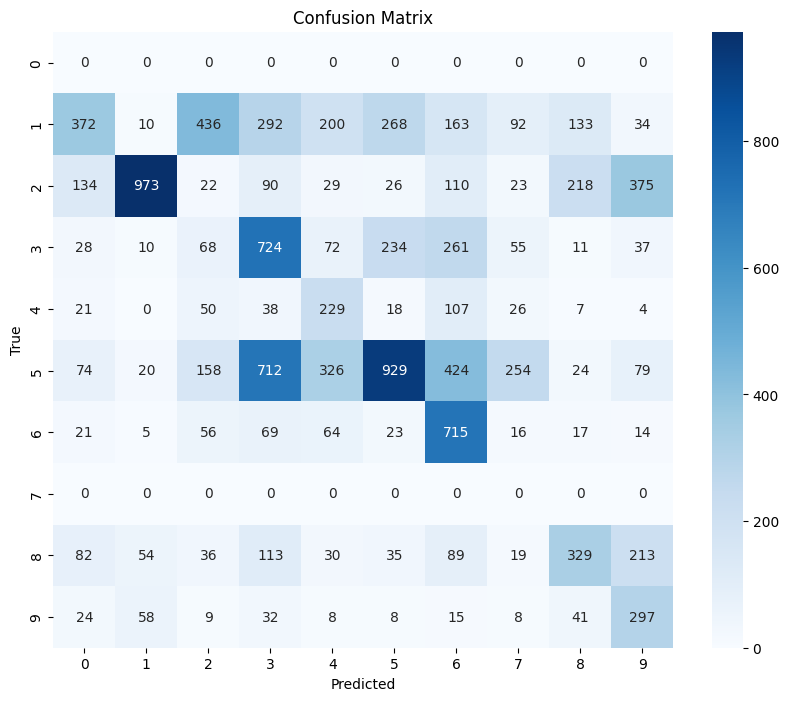

[[  0   0   0   0   0   0   0   0   0   0]
 [372  10 436 292 200 268 163  92 133  34]
 [134 973  22  90  29  26 110  23 218 375]
 [ 28  10  68 724  72 234 261  55  11  37]
 [ 21   0  50  38 229  18 107  26   7   4]
 [ 74  20 158 712 326 929 424 254  24  79]
 [ 21   5  56  69  64  23 715  16  17  14]
 [  0   0   0   0   0   0   0   0   0   0]
 [ 82  54  36 113  30  35  89  19 329 213]
 [ 24  58   9  32   8   8  15   8  41 297]]


In [19]:
from torchvision.datasets import ImageFolder
from PIL import Image
import torch
from torchvision import transforms
import os
import numpy as np
import matplotlib.pyplot as plt
def relabel_tinyimage(label):
    mapping = {
        0: 1,    # car
        1: 2,    # bird
        2: 3,    # cat
        3: 4,    # deer
        4: 5,    # dog
        5: 6,    # frog
        6: 8,    # ship
        7: 9     # truck
    }
    return mapping.get(label, label) 

TinyImage = ImageFolder(
    root='data/TinyImage/cross_testing',
    transform= transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor()]),
    target_transform=relabel_tinyimage
)

tinyimage_loader = DataLoader(TinyImage, batch_size=32, shuffle=True)
cifar10_pretrained = torch.load('cifar10_pretrained.pth', weights_only = False) 
loss_cifar10_pretrained = nn.CrossEntropyLoss().to(device)
print(accuracy(cifar10_pretrained,tinyimage_loader, loss_cifar10_pretrained))
print(confusion_matrix_plot(cifar10_pretrained,tinyimage_loader))

## Reporting code


In [124]:
train_loader = torch.utils.data.DataLoader(train_cifar10, batch_size=32,shuffle=True)
val_loader= torch.utils.data.DataLoader(val_cifar10,batch_size = 32,shuffle= True)

def train_val_eval(model,loss_func):
    train_loss, train_acc = accuracy(model,train_loader, loss_func) 
    val_loss, val_acc = accuracy(model,val_loader, loss_func) 
    print(train_acc, val_acc)
    
train_val_eval(cnn_baseline, loss_baseline)
train_val_eval(cnn_variant2, loss_variant2)
train_val_eval(cnn_variant3, loss_variant3)
train_val_eval(cifar10_pretrained, loss_cifar10_pretrained)

0.661625 0.5831


0.575875 0.5299


0.7317 0.6397


0.749125 0.6599


In [125]:
#train_val_eval(cnn_variant3, loss_variant3)
train_loader = torch.utils.data.DataLoader(train_cifar100, batch_size=32,shuffle=True)
val_loader= torch.utils.data.DataLoader(val_cifar100,batch_size = 32,shuffle= True)
train_val_eval(cnn_cifar100, loss_cifar100)


0.3977 0.3344


In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def confusion_matrix_plot(model, data_loader):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_targets = []
    
    with tqdm(data_loader, unit='batch', leave=False) as tepoch:
        with torch.no_grad():  # No need to track gradients
            for x, labels in tepoch:
                tepoch.set_description(f"Computing confusion matrix")
                inputs, labels = x.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                
                all_preds.extend(predicted.cpu().numpy())
                all_targets.extend(labels.cpu().numpy())
    
    cm = confusion_matrix(all_targets, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    return cm

(1.8233485591297331, 0.6369)


(1.7999682746375332, 0.6603)


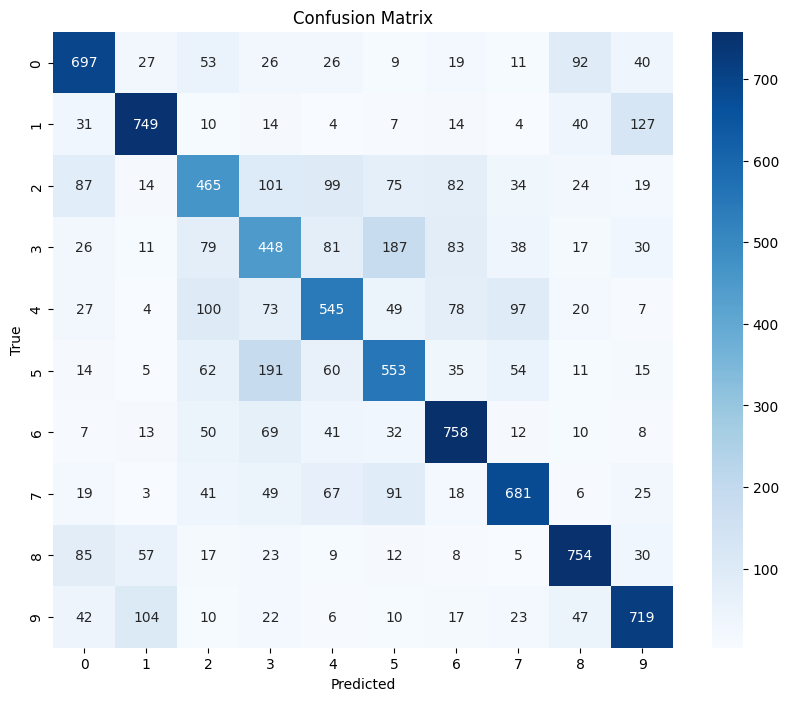

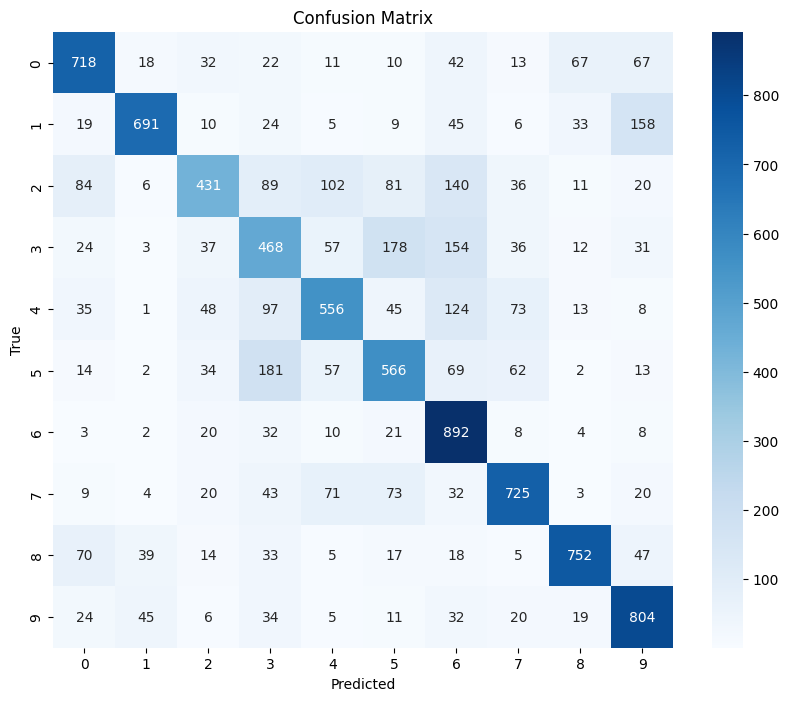

array([[718,  18,  32,  22,  11,  10,  42,  13,  67,  67],
       [ 19, 691,  10,  24,   5,   9,  45,   6,  33, 158],
       [ 84,   6, 431,  89, 102,  81, 140,  36,  11,  20],
       [ 24,   3,  37, 468,  57, 178, 154,  36,  12,  31],
       [ 35,   1,  48,  97, 556,  45, 124,  73,  13,   8],
       [ 14,   2,  34, 181,  57, 566,  69,  62,   2,  13],
       [  3,   2,  20,  32,  10,  21, 892,   8,   4,   8],
       [  9,   4,  20,  43,  71,  73,  32, 725,   3,  20],
       [ 70,  39,  14,  33,   5,  17,  18,   5, 752,  47],
       [ 24,  45,   6,  34,   5,  11,  32,  20,  19, 804]], dtype=int64)

In [150]:
test_loader = torch.utils.data.DataLoader(test_cifar10,batch_size = 32,shuffle= True)

print(accuracy(cnn_variant3,test_loader, loss_variant3))
print(accuracy(cifar10_pretrained,test_loader, loss_cifar10_pretrained))
confusion_matrix_plot(cnn_variant3,test_loader)
confusion_matrix_plot(cifar10_pretrained,test_loader)

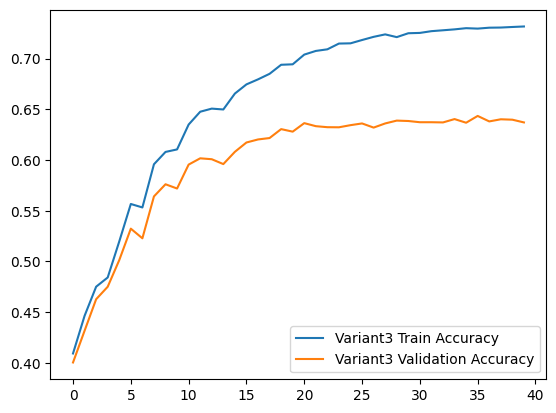

In [122]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.array(variant3_train_history).T[1])
plt.plot(np.array(variant3_val_history).T[1])
plt.legend(['Variant3 Train Accuracy','Variant3 Validation Accuracy'])

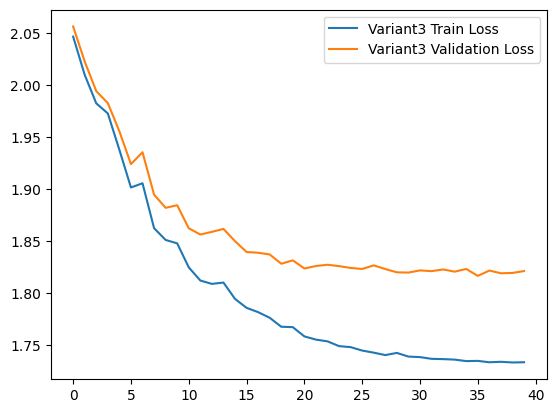

In [121]:
plt.plot(np.array(variant3_train_history).T[0])
plt.plot(np.array(variant3_val_history).T[0])
plt.legend(['Variant3 Train Loss','Variant3 Validation Loss'])

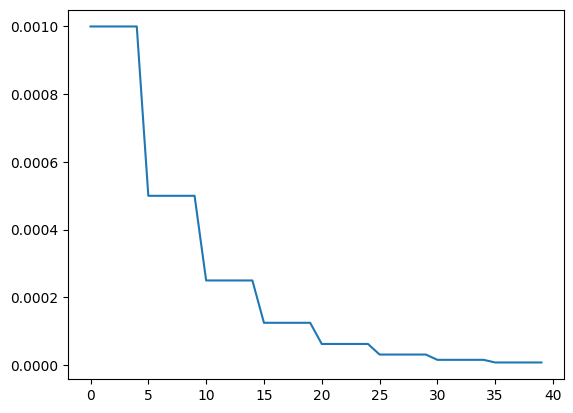

In [153]:
plt.plot(np.array(variant3_lr))